In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


Read and Analyse Data


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# read data
df = pd.read_csv("survey lung cancer.csv")

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


Missing Value Analysis

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.isnull().values.any()

False

Data Visualization

In [12]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


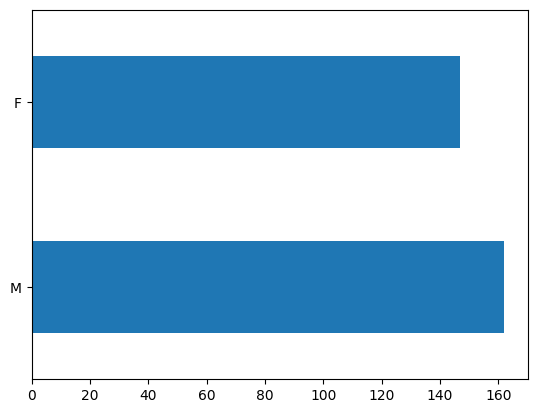

In [13]:
df["GENDER"].value_counts().plot.barh();

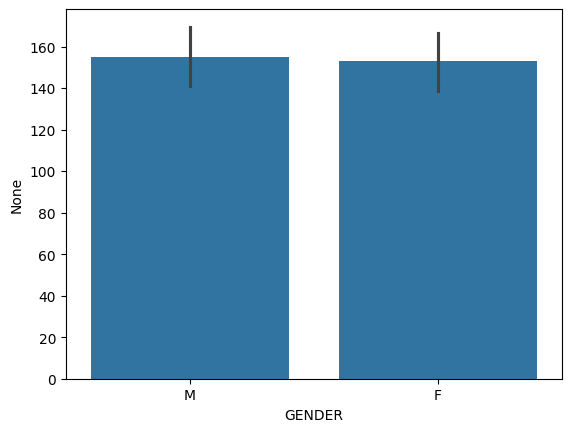

In [14]:
sns.barplot(x = "GENDER", y = df.GENDER.index, data= df);

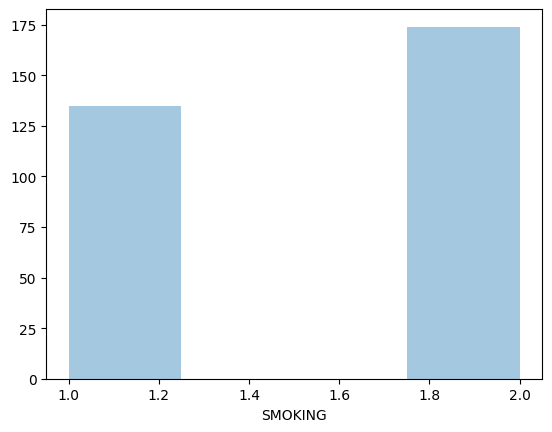

In [15]:
sns.distplot(df.SMOKING, kde = False);

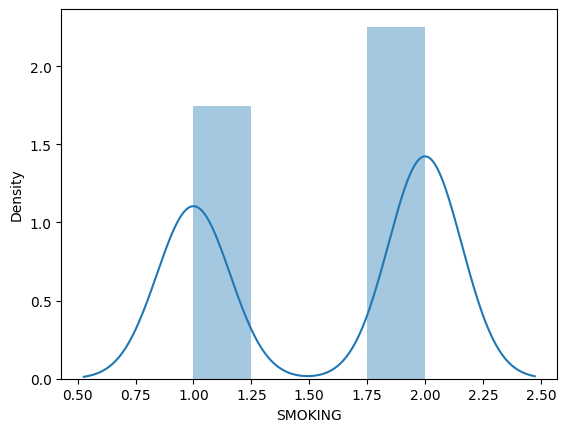

In [16]:
sns.distplot(df.SMOKING);

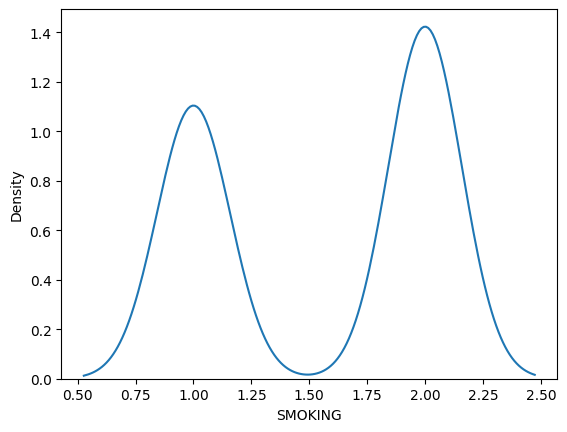

In [17]:
sns.distplot(df.SMOKING, hist = False);

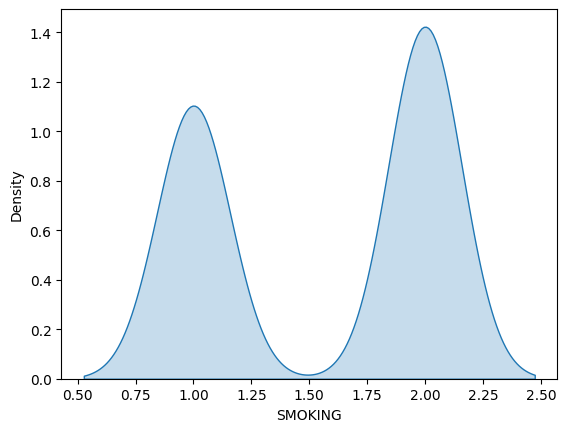

In [18]:
sns.kdeplot(df.SMOKING, shade = True);

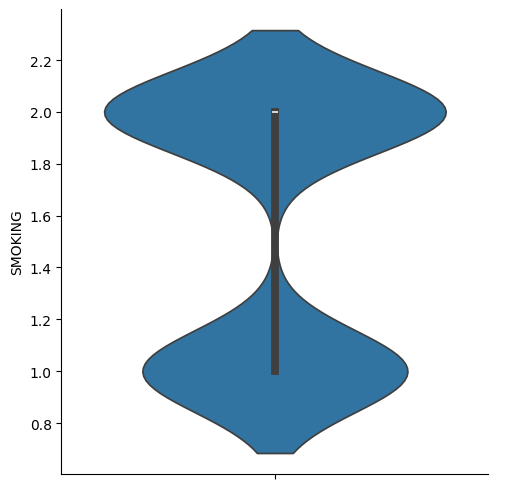

In [19]:
sns.catplot(y = "SMOKING", kind = "violin", data = df);

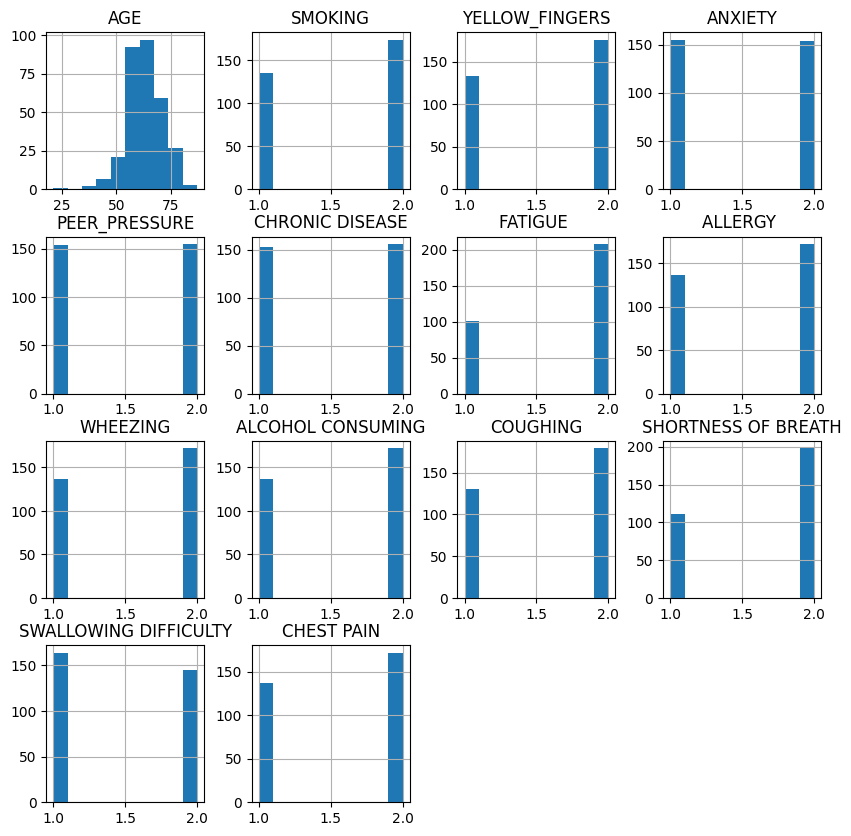

In [20]:
df.hist(figsize = (10,10));

**Data Preprocessing**

In [21]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [22]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [23]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [24]:
df_num.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [25]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [26]:
df_num["SMOKING"].describe()

count    309.000000
mean       1.563107
std        0.496806
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: SMOKING, dtype: float64

In [27]:
print("Mean: " + str(df_num["SMOKING"].mean()))
print("Count: " + str(df_num["SMOKING"].count()))
print("Max: " + str(df_num["SMOKING"].max()))
print("Min: " + str(df_num["SMOKING"].min()))
print("Meadian: " + str(df_num["SMOKING"].median()))
print("Standart: " + str(df_num["SMOKING"].std()))

Mean: 1.5631067961165048
Count: 309
Max: 2
Min: 1
Meadian: 2.0
Standart: 0.4968060894409518


In [28]:
df["SMOKING"].value_counts()

2    174
1    135
Name: SMOKING, dtype: int64

In [29]:
df["GENDER"].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [30]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [31]:
categorical_list = ["GENDER","LUNG_CANCER"]

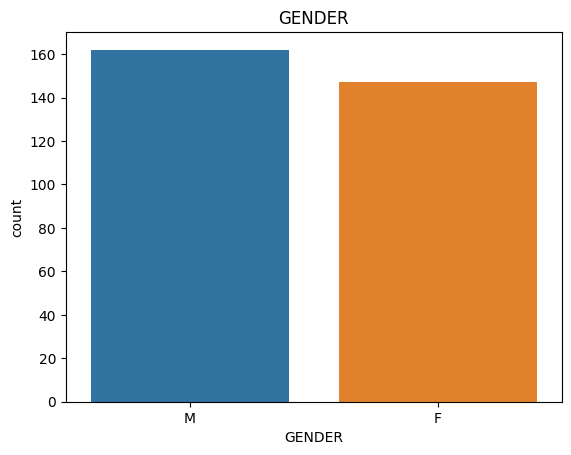

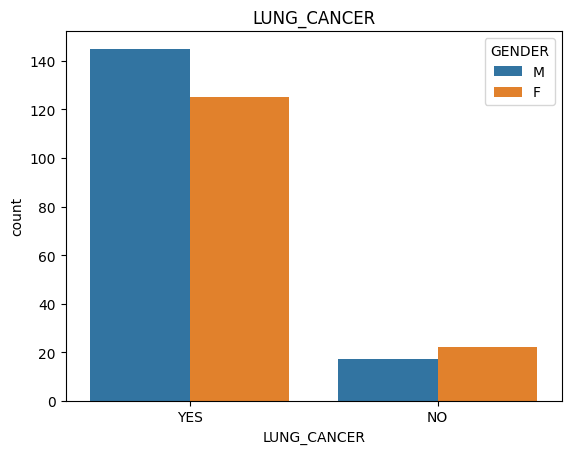

In [32]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "GENDER")
    plt.title(i)

Outlier

In [33]:
for i in df_num:

    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)

    IQR = Q3 - Q1

    print("Old shape: ", df.loc[:, i].shape)

    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))

    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))

    print("{} -- {}".format(upper, lower))

    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))

    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))

    print("New shape: ", df.shape)

Old shape:  (309,)
(array([], dtype=int64),) -- (array([22]),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (308, 16)
Old shape:  (308,)
(array([], dtype=int64),) -- (ar

Standardization

In [34]:
from sklearn import preprocessing

In [35]:
preprocessing.scale(df_num)

array([[ 0.77185028, -1.13529242,  0.86929961, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 1.38182914,  0.88083033, -1.15035137, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-0.44810745, -1.13529242, -1.15035137, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [-0.57010322,  0.88083033, -1.15035137, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.52785873,  0.88083033, -1.15035137, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [-0.08212013, -1.13529242, -1.15035137, ..., -1.33558369,
         1.06350105, -1.12047956]])

LabelEncoder

In [36]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [37]:
lbe.fit_transform(df["GENDER"])

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [38]:
lbe.fit_transform(df["LUNG_CANCER"])

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [39]:
categorical_list

['GENDER', 'LUNG_CANCER']

In [40]:
df["new_GENDER"] = lbe.fit_transform(df["GENDER"])
df["new_LUNGCANCER"] = lbe.fit_transform(df["LUNG_CANCER"])

In [41]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,new_GENDER,new_LUNGCANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1,1


In [42]:
df["GENDER"].str.contains("M")

0       True
1       True
2      False
3       True
4      False
       ...  
304    False
305     True
306     True
307     True
308     True
Name: GENDER, Length: 308, dtype: bool

In [43]:
df["new_GENDER"] = np.where(df["GENDER"].str.contains("M"), 1, 0)

In [45]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,new_GENDER,new_LUNGCANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0


One Hot

In [46]:
df_one_hot = pd.get_dummies(df, columns = ["GENDER"], prefix = ["GENDER"])

In [47]:
df_one_hot = pd.get_dummies(df, columns = ["LUNG_CANCER"], prefix = ["LUNG_CANCER"])

In [48]:
df_one_hot.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,new_GENDER,new_LUNGCANCER,LUNG_CANCER_NO,LUNG_CANCER_YES
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1,0,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1,0,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0,1,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0,1,0


In [49]:
pd.get_dummies(df, columns = ["GENDER"], prefix = ["GENDER"]).head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,new_GENDER,new_LUNGCANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0,1,0


In [50]:
pd.get_dummies(df, columns = ["LUNG_CANCER"], prefix = ["LUNG_CANCER"]).head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,new_GENDER,new_LUNGCANCER,LUNG_CANCER_NO,LUNG_CANCER_YES
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1,0,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1,0,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0,1,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0,1,0


In [51]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,new_GENDER,new_LUNGCANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0


In [52]:
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df['GENDER'] = pd.to_numeric(df['GENDER'], errors='coerce')
df['LUNG_CANCER'] = pd.to_numeric(df['LUNG_CANCER'], errors='coerce')
df['GENDER'] = df['GENDER'].astype(float)
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(float)

KNN

In [53]:
y = df["GENDER"]
X = df.drop(["GENDER"], axis=1)

In [55]:
y = df["LUNG_CANCER"]
X = df.drop(["LUNG_CANCER"], axis=1)

In [57]:
y = df["GENDER"]
X = df.drop(['GENDER'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [58]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [59]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [62]:
y_pred = knn_model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.8279569892473119

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81        40
         1.0       0.88      0.81      0.84        53

    accuracy                           0.83        93
   macro avg       0.83      0.83      0.83        93
weighted avg       0.83      0.83      0.83        93



In [64]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [65]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [66]:
knn_cv.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [67]:
print("best score:" + str(knn_cv.best_score_))
print("best parameter: " + str(knn_cv.best_params_))

best score:0.8372294372294371
best parameter: {'n_neighbors': 3}


In [68]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [69]:
knn_tuned.score(X_test, y_test)

0.7956989247311828

In [70]:
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7956989247311828

Gaussian Naive Bayes

In [71]:
y = df["GENDER"]
X = df.drop(['GENDER'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [72]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [73]:
nb_model.predict(X_test)[0:10]

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.])

In [74]:
nb_model.predict_proba(X_test)[0:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [75]:
y_pred = nb_model.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

1.0

In [78]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

1.0

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn_model, X, y, cv=10)

print("Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross Validation Scores: [0.80645161 0.83870968 0.83870968 0.70967742 0.93548387 0.83870968
 0.87096774 0.70967742 0.9        1.        ]
Average Score: 0.8448387096774195


Artificial Neural Networks

In [80]:
y = df["GENDER"]
X = df.drop(['GENDER'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
X_test_scaled[0:5]

array([[-0.23895828,  0.87309512, -1.13456337, -1.01405221, -1.03310585,
         1.02353263,  0.67283185,  0.93250481, -1.12390297, -1.03310585,
        -1.16732059,  0.78520147, -0.89817743, -1.08245885,  0.38695299,
        -1.01405221,  0.38695299],
       [-1.28478077,  0.87309512,  0.88139634,  0.98614252,  0.96795503,
         1.02353263, -1.48625544,  0.93250481, -1.12390297,  0.96795503,
        -1.16732059, -1.27355849,  1.11336577,  0.92382264,  0.38695299,
         0.98614252,  0.38695299],
       [-2.06914764, -1.14535058,  0.88139634, -1.01405221,  0.96795503,
         1.02353263,  0.67283185, -1.07238053,  0.88975652, -1.03310585,
        -1.16732059,  0.78520147,  1.11336577,  0.92382264,  0.38695299,
         0.98614252,  0.38695299],
       [-0.36968609, -1.14535058,  0.88139634,  0.98614252, -1.03310585,
        -0.97700842, -1.48625544, -1.07238053, -1.12390297, -1.03310585,
         0.85666269, -1.27355849, -0.89817743, -1.08245885, -2.58429322,
        -1.01405221

In [84]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [85]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

1.0

In [86]:
mlpc

MLPClassifier()

In [87]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5),
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [89]:
loj_model.intercept_

array([-0.21701534])

In [90]:
loj_model.coef_

array([[-0.01822442, -0.04715396, -0.24412947, -0.15921608, -0.52423325,
        -0.50767081, -0.17947645, -0.01072868, -0.01317516,  0.50819022,
         0.02410201, -0.2394004 , -0.09276919,  0.40940599,  0.07442663,
         5.95339629,  0.07442663]])

In [91]:
y_pred = loj_model.predict(X)

In [92]:
accuracy_score(y, y_pred)

1.0

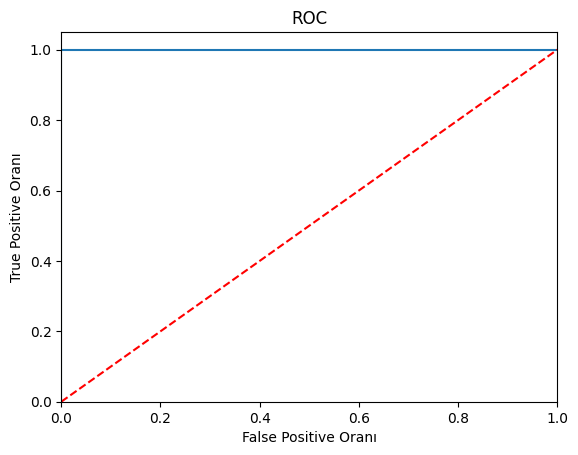

In [94]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [96]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [97]:
accuracy_score(y_test, loj_model.predict(X_test))

1.0

In [98]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

1.0

SVC

In [99]:
y = df["GENDER"]
X = df.drop(['GENDER'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [100]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
svm_model

SVC(kernel='linear')

In [101]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [102]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

Random Forests

In [103]:
y = df["GENDER"]
X = df.drop(['GENDER'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [104]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [105]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [106]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [107]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

In [108]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 8,
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [109]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [110]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

<Axes: >

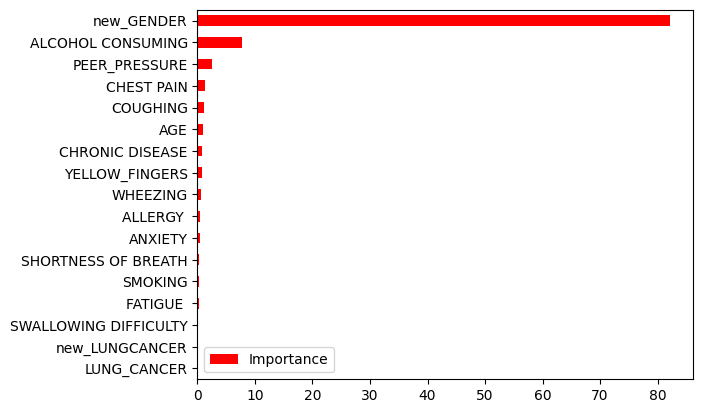

In [111]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")


TUGAS AKHIR
TOPIK " Optimasi	K-Nearest	Neighbor	dengan	Grid	Search	CV	pada	Prediksi	Kanker	Paru Paru"
NAMA : VILANDA HARSONO
NIM : 202211022
ARIGATOOO SENSAI -